# Decision Tree Classification

Topics:
+ Classification versus regression
+ Decision tree classification
+ Decision tree visualization (dtreeviz)
+ Gini impurity, entropy (surprise)
+ lcplot

Datasets:
+ iris
+ admission
+ diabetes
+ breast cancer

In [1]:
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *
from matplotlib import pyplot
import pandas
import seaborn

In [2]:
# df = pandas.read_csv('../../Datasets/iris50.csv')
# X = df[['SepalWidth','SepalLength','PetalWidth','PetalLength']]
# y = df.Species
# dt4 = tree.DecisionTreeClassifier(max_depth=4, criterion='entropy')
# dt4.fit(X,y)


In [3]:
# viz = dtreeviz(dt4, X, y, feature_names=X.columns)  
# viz.view()

In [4]:
# print(tree.export_text(dt4))

In [5]:
# fig = pyplot.figure(figsize=(25,20))
# _=tree.plot_tree(dt4)

### Regression vs Classification

In regression, we model y based on X.
+ y is continuous.
+ y is petal width; X is (petal length, sepal length).
+ y is house prices; X is (median income, location, house age).

In classifcation, we model y based on X.
+ y is discrete.
+ y is iris species; X is (petal length, petal width).



In both regression and classification, we can make predictions using the models.

To evaluate the models, we have cross validate.

Cross validation means training and testing (many times).

In [7]:
import pandas, seaborn

In [8]:
df = pandas.read_csv('../Datasets/iris50.csv')

In [9]:
df.sample(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
38,6.0,2.2,4.0,1.0,0
41,7.0,3.2,4.7,1.4,0
49,5.6,2.5,3.9,1.1,0
8,5.7,2.8,4.1,1.3,0
29,6.3,3.4,5.6,2.4,1


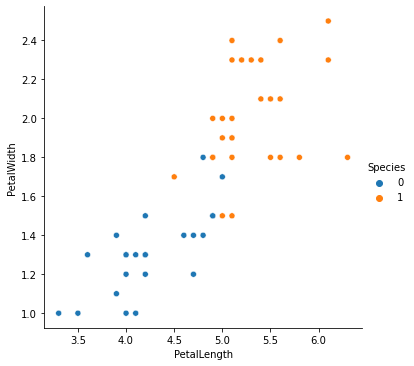

In [10]:
seaborn.relplot(data=df, x='PetalLength', y='PetalWidth', hue='Species')

In [11]:
from sklearn.tree import DecisionTreeClassifier

We want to model the relationship between Species (y) and petal width and petal length (X).

The model can also allow us to make predictions about y, based on X.

In [12]:
model = DecisionTreeClassifier()

In [13]:
X = df[['PetalWidth','PetalLength']]
y = df['Species']

#### Let's make some predictions


In [14]:
test_data = [[1.0,3.5],  [1.8,4.7], [2.2,5.5]]

In [15]:
model.fit(X,y)

DecisionTreeClassifier()

In [16]:
model.predict(test_data)

array([0, 0, 1], dtype=int64)

### How good is this model?

To answer this, we have to cross validate it.

In [17]:
from sklearn.model_selection import ShuffleSplit, cross_validate

In [18]:
model = DecisionTreeClassifier()
X = df[['PetalWidth','PetalLength']]
y = df['Species']
shuffler = ShuffleSplit(n_splits=100)
result = cross_validate(model, X, y, cv=shuffler)

In [19]:
result['test_score'].mean().round(2), result['test_score'].std().round(2)

(0.9, 0.14)

```
from sklearn.tree import export_text, plot_tree
pyplot.figure(figsize=(25,20))
export_text(model)
plot_tree(model)

from dtreeviz.trees import dtreeviz
viz = dtreeviz(model, X, y, feature_names=X.columns, fancy=True)  
viz.view() 
```

In [21]:
model.fit(X,y)

DecisionTreeClassifier()

In [22]:
from sklearn.tree import export_text, plot_tree

In [23]:
print(export_text(model))

|--- feature_0 <= 1.75
|   |--- feature_1 <= 4.95
|   |   |--- feature_0 <= 1.60
|   |   |   |--- class: 0
|   |   |--- feature_0 >  1.60
|   |   |   |--- class: 1
|   |--- feature_1 >  4.95
|   |   |--- feature_0 <= 1.60
|   |   |   |--- class: 1
|   |   |--- feature_0 >  1.60
|   |   |   |--- class: 0
|--- feature_0 >  1.75
|   |--- feature_1 <= 4.85
|   |   |--- class: 0
|   |--- feature_1 >  4.85
|   |   |--- class: 1



[Text(197.83636363636364, 190.26, 'X[0] <= 1.75\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(121.74545454545455, 135.9, 'X[1] <= 4.95\ngini = 0.211\nsamples = 25\nvalue = [22, 3]'),
 Text(60.872727272727275, 81.53999999999999, 'X[0] <= 1.6\ngini = 0.087\nsamples = 22\nvalue = [21, 1]'),
 Text(30.436363636363637, 27.180000000000007, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(91.30909090909091, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(182.61818181818182, 81.53999999999999, 'X[0] <= 1.6\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(152.1818181818182, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(213.05454545454546, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(273.92727272727274, 135.9, 'X[1] <= 4.85\ngini = 0.077\nsamples = 25\nvalue = [1, 24]'),
 Text(243.4909090909091, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(304.3636363636364, 81.53999999999999, 'gini = 0.0

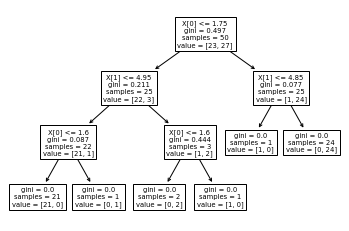

In [24]:
plot_tree(model)

In [27]:
from dtreeviz.trees import dtreeviz

In [28]:
viz = dtreeviz(model, X, y, feature_names=X.columns, fancy=True)  
viz.view() 

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

In [29]:
from matplotlib import pyplot


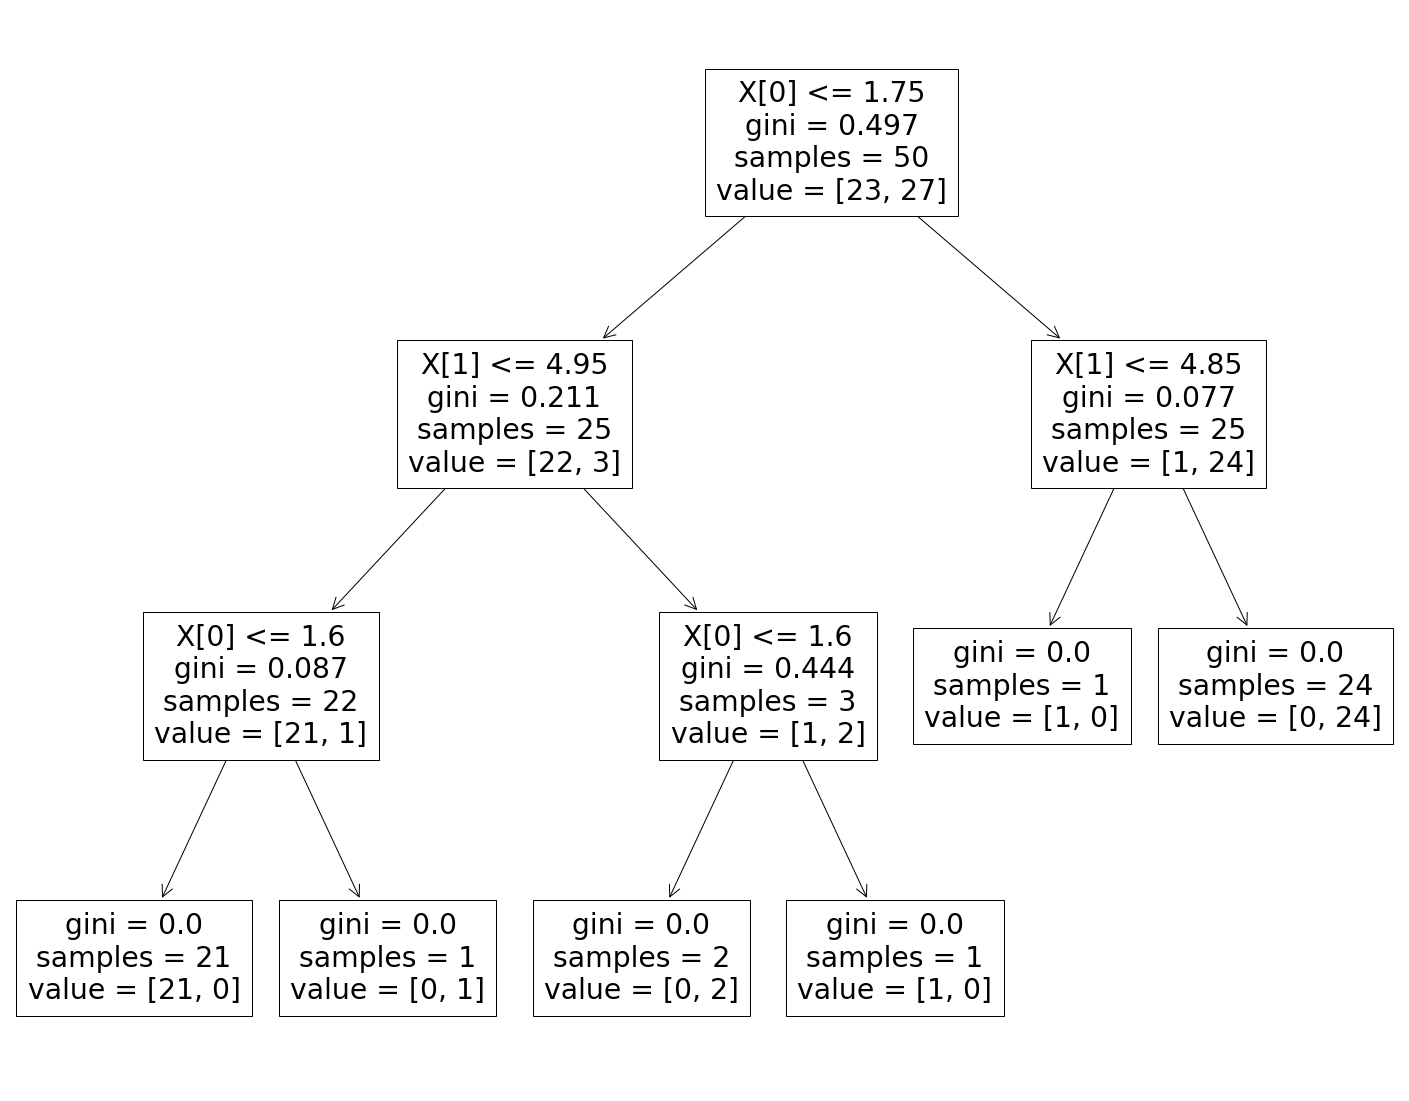

In [30]:
pyplot.figure(figsize=(25,20))
_ = plot_tree(model)

The gini impurity tells us how pure a set of data is.

Decision tree classifer attempts to group data into pure subsets.

<img src="gini-impurity.png" width="50%">

p is the probability of randomly selecting a data point with y=1.

(1-p) is the probability of randomly selecting a data point with y=0.

gini impurity = $p*(1-p) + (1-p)*p$

gini impurity is the probability of randomly selecting an item and mislabeling it.

a data point with y=1, is selected randomly with probability p.

And it is mislabeled with probabily (1-p).